# Representing IMDB's Science-Fiction Films by Popularity

## Table of Contents
- Introduction
- First Glances
- Cleanup
- Visualization
- Reflection

## Introduction
### Purpose
While at one point in time science-fiction was more of a 'nerdy' niche, many of the world's highest grossing films have the science-fiction genre tag thrown at it.  The genre itself has evolved over the years and also has sprouted numerous subgenres, for instance space opera or cyberpunk.  In this notebook, as well as using the developer tools as necessary, we will explore over 10,000 science-fiction films that I scrapped from the IMDB website.  All of this information is of July 8th, 2021 and includes movies not released yet.

## First Glances

In [1]:
# importing modules for data analytics
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline

# import our custom web scraped csv and create main DataFrame
# show the top 20 films
csv = pd.read_csv(filepath_or_buffer='../input/top-scifi-on-imdb/topscifi.csv')
df = pd.DataFrame(csv)
df.head(20)

,Rank,Title,Year,Rating,Runtime,Genre,User Rating,Metacritic
0,1,The Tomorrow War,2021,PG-13,140 min,"Action, Adventure, Sci-Fi",6.7,45.0
1,2,A Quiet Place Part II,2020,PG-13,97 min,"Drama, Horror, Sci-Fi",7.5,71.0
2,3,Black Widow,2021,PG-13,133 min,"Action, Adventure, Sci-Fi",7.4,67.0
3,4,The Suicide Squad,2021,R,,"Action, Adventure, Comedy",,NaN
4,5,Shang-Chi and the Legend of the Ten Rings,2021,,,"Action, Adventure, Fantasy",,NaN
5,6,America: The Motion Picture,2021,TV-MA,98 min,"Animation, Action, Adventure",5.7,40.0
6,7,A Quiet Place,2018,PG-13,90 min,"Drama, Horror, Sci-Fi",7.5,82.0
7,8,Infinite,2021,PG-13,106 min,"Action, Sci-Fi, Thriller",5.4,28.0
8,9,Tenet,2020,PG-13,150 min,"Action, Sci-Fi, Thriller",7.4,69.0
9,10,Army of the Dead,2021,R,148 min,"Action, Crime, Horror",5.8,57.0


In [2]:
# pulling top 20 metacritic
df.head(20).sort_values(
by=['Metacritic'],
ascending=False)

,Rank,Title,Year,Rating,Runtime,Genre,User Rating,Metacritic
6,7,A Quiet Place,2018,PG-13,90 min,"Drama, Horror, Sci-Fi",7.5,82.0
15,16,Avengers: Endgame,2019,PG-13,181 min,"Action, Adventure, Drama",8.4,78.0
18,19,Thor: Ragnarok,2017,PG-13,130 min,"Action, Adventure, Comedy",7.9,74.0
1,2,A Quiet Place Part II,2020,PG-13,97 min,"Drama, Horror, Sci-Fi",7.5,71.0
8,9,Tenet,2020,PG-13,150 min,"Action, Sci-Fi, Thriller",7.4,69.0
2,3,Black Widow,2021,PG-13,133 min,"Action, Adventure, Sci-Fi",7.4,67.0
10,11,Godzilla vs. Kong,2021,PG-13,113 min,"Action, Sci-Fi, Thriller",6.4,59.0
9,10,Army of the Dead,2021,R,148 min,"Action, Crime, Horror",5.8,57.0
14,15,Zack Snyder's Justice League,2021,R,242 min,"Action, Adventure, Fantasy",8.1,54.0
0,1,The Tomorrow War,2021,PG-13,140 min,"Action, Adventure, Sci-Fi",6.7,45.0


From the initial pull of data we can observe that a good number of the most trending films have not been released yet.  Of course indicating we are missing ratings from both the 'Users' and 'Metacritic'.  As trend is fueled by 'hype', by far most of the films in the top 20, if they've been released, have only been out 2-3 years maximum.  One of the outliers in this case is Thor: Ragnarok which was released in 2017.  It also has the third highest Metacritic with the others being in the 1st and 2nd place for Metacritic score.  These films rank considerbly well in overall popularity considering the rest of the top 20 are films that are fueled by current hype.  Do films that score well by critics tend to stand the test of time better than the films that were only fueled by hype?

## Cleanup
We have two main issues.  One being films that have not been released yet (they lack critic and user rating data).  And the second being less popular films that don't have the included data.  We have no need to visualize this data so we will remove them.

For the films that have not been released, we do not need to fill in any details under the 'User Rating' or 'Metacritic' column because that data does not yet exist!  However, the data is inconsistent regarding 'Rating' and 'Runtime' because some films simply are at different stages of their production (If an unreleased film is further along in their production, they can actually release that data). 
As for the less popular films, it is also a situation where if the data does not exist, we simply cannot replace it.

The data we are working with is discrete quantitative data.  The objects are individual and the data in each column for each object are not dependent on any other object. There has also been an addition of roman numerals for some films in the year column.  Let's remove these so there isn't an issue when visualizing.

### Roman Numerals in 'Data'

In [3]:
# all the unique values we have under 'Year'
# you can see the examples we need to remove or replace
df['Year'].unique()

array(['2021', '2020', '2018', '2019', '2022', '2017', 'III 2021', '2014',
       '1996', '2010', '1999', '1979', '1985', '1982', '2016', '1993',
       'I 2020', '2012', '2011', '1986', 'I 2013', '2015', 'I 2019',
       '2009', '1991', '1984', '2006', '2002', 'II 2016', '2008',
       'I 2018', '1994', '1997', '1977', '2001', '1971', '2007', '2004',
       'I 2016', 'I 2022', 'I 2012', '1987', '2013', 'I 2014', '1968',
       '1988', '1998', '1990', '2005', '2003', '1989', 'I 2021', '2000',
       'II 2020', 'I 2017', '1995', '1980', 'I 2009', 'II 2015', '1981',
       '1983', '1978', '2023', '1992', 'II 2019', 'I 2011', 'IV 2020',
       'I 2005', '1976', '1973', nan, 'II 2018', 'I 2008', '1972', '1975',
       '1927', 'I 1998', 'I 1984', '1960', '1958', '1970', '1933', '1974',
       'V 2021', '1956', '1954', 'II 2012', '1966', '1931', '1951',
       '1952', '1953', '1963', 'I 2007', '1959', 'I 2000', 'VII 2013',
       'II', 'I 2006', 'VI', 'I 2015', '2024', '1961', 'I', '1935',
 

In [4]:
# using the str.extract method, we can pass a regex to extract only the numeric parts of our string
# look at the array below now
# besides the odd 'nan' indicator we have a much cleaner coloumn of years
df['Year'] = df['Year'].str.extract('(\d+)', expand=False)
df['Year'].unique()

array(['2021', '2020', '2018', '2019', '2022', '2017', '2014', '1996',
       '2010', '1999', '1979', '1985', '1982', '2016', '1993', '2012',
       '2011', '1986', '2013', '2015', '2009', '1991', '1984', '2006',
       '2002', '2008', '1994', '1997', '1977', '2001', '1971', '2007',
       '2004', '1987', '1968', '1988', '1998', '1990', '2005', '2003',
       '1989', '2000', '1995', '1980', '1981', '1983', '1978', '2023',
       '1992', '1976', '1973', nan, '1972', '1975', '1927', '1960',
       '1958', '1970', '1933', '1974', '1956', '1954', '1966', '1931',
       '1951', '1952', '1953', '1963', '1959', '2024', '1961', '1935',
       '1957', '1964', '2028', '1955', '1965', '1948', '1969', '2026',
       '1967', '1936', '1932', '1942', '1962', '1941', '2025', '1939',
       '1949', '1943', '1940', '1925', '1944', '1945', '1920', '1950',
       '1924', '1946', '1916', '1938', '1929', '1930', '1937', '1934',
       '1928', '1947', '2027', '1923', '1918', '1922', '1926', '1913',
       '1

Success.

### Fixing Null Values

There are several situations where NaN indicators will be useful to filter out objects we don't need while visualizing the data. Let's fill the blanks with NaN indicators.

In [5]:
df.isnull().sum()

Rank               0
Title              0
Year            4429
Rating             0
Runtime            0
Genre              0
User Rating        0
Metacritic     13680
dtype: int64

We can see here that there is an incredible number of films without a metacritic rating or year.  With all the 'empty' boxes we have in our DataFrame, let's give them NaN values as well so we can filter our results.

In [6]:
# replacing empty strings with null values
df['Rating'] = df['Rating'].replace(r'^\s*$', np.nan, regex=True)
df['User Rating'] = df['User Rating'].replace(r'^\s*$', np.nan, regex=True)
df['Runtime'] = df['Runtime'].replace(r'^\s*$', np.nan, regex=True)
df.isnull().sum()

Rank               0
Title              0
Year            4429
Rating         10422
Runtime         5484
Genre              0
User Rating     6520
Metacritic     13680
dtype: int64

In [7]:
# dropping all 'User Rating' objects with null values
df = df.dropna(subset=['User Rating'], how='all')
# converting 'Metacritic' to ints
df['Metacritic'] = df['Metacritic'].fillna(0.0).astype(int)
df['Metacritic'] = df['Metacritic'].replace(0, np.nan, regex=True)
# converting 'User Rating' to floats
df['User Rating'] = df['User Rating'].astype(float)
# top 1000
df = df[:1000]
# dropping tv movies and random labels
df = df[df['Rating'] != 'Unrated']
df = df[df['Rating'] != 'TV-14']
df = df[df['Rating'] != 'Approved']
df = df[df['Rating'] != 'Passed']
df = df[df['Rating'] != 'TV-PG']
df = df[df['Rating'] != 'TV-G']
df = df[df['Rating'] != 'TV-MA']
df = df[df['Rating'] != 'Not Rated']

All blank values have been adjusted.

## Visualization

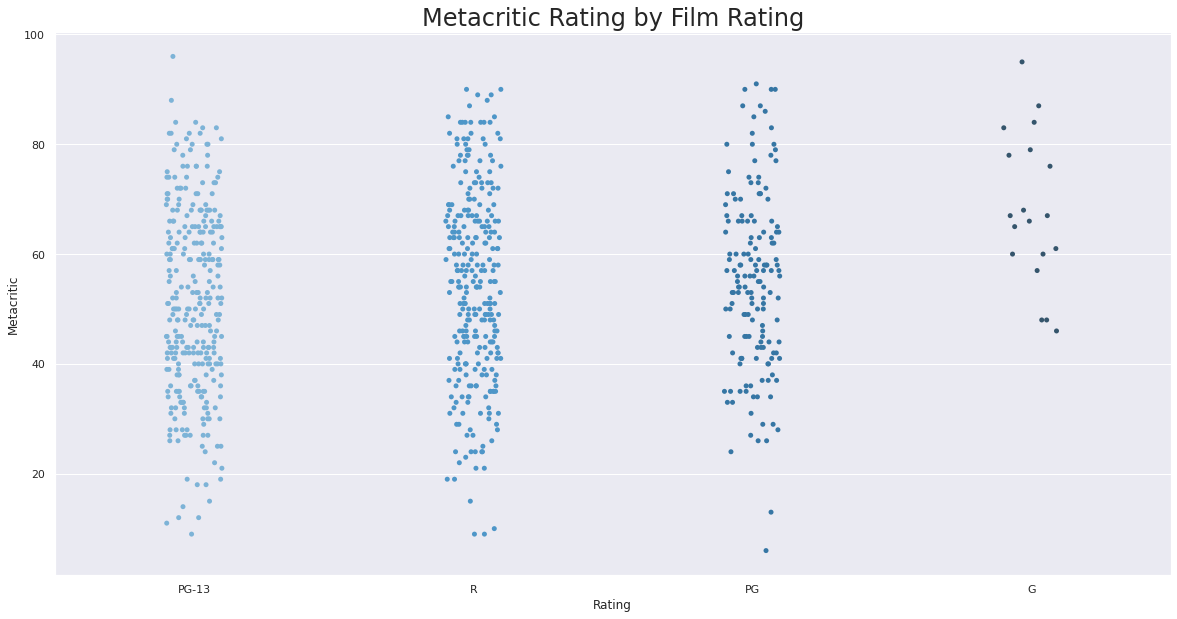

In [8]:
# stripplot
def plot1():
    fig, ax = plt.subplots(figsize=(20,10))
    sns.stripplot(x="Rating", y="Metacritic", data=df, palette=("Blues_d"), ax=ax)
    sns.set_context("poster")
    ax.set_title("Metacritic Rating by Film Rating")
    
plot1()

Compared to the other film ratings, there are a lot less sci-fi movies that were intended for the 'G' audience than the others.  Because of that, I will not provide analysis in that category but it is interesting to note that movies in the 'G' category in the top 1000 scifi movies score incredibly well compared to the other categories.  In general, 'PG-13', 'R', and 'PG' sci-fi movies have very similar spread regarding their metacritic ratings.  The bulk of the ratings start near 20 and finish up near the 80 mark.  One exception being the 'R' category where there is enough sufficient data to conclude that there are more sci-fi movies above the 80 score tier than the other categories.  We can visualize this better by observing our 2nd plot.

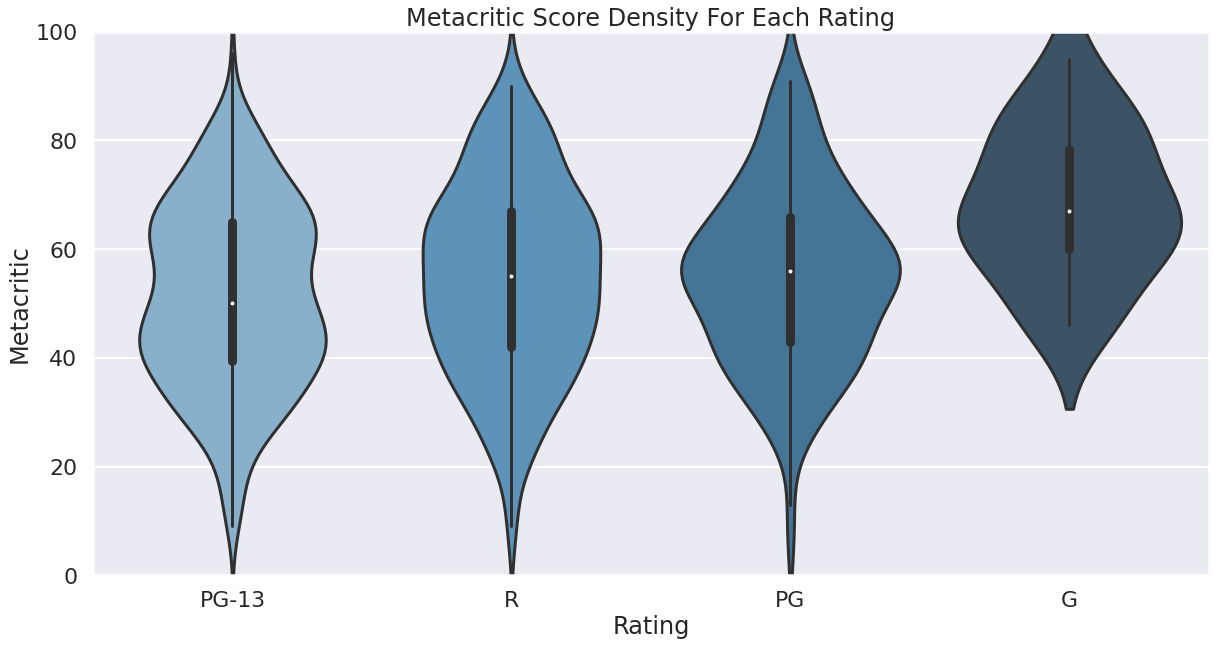

In [9]:
# violin plot representing data density at certain metacritic ratings
def plot2():
    fig, ax = plt.subplots(figsize=(20,10))
    sns.violinplot(data=df, x="Rating", y="Metacritic", palette=("Blues_d"), ax=ax)
    sns.set_context("poster")
    ax.set(ylim=(0, 100))
    ax.set_title("Metacritic Score Density For Each Rating")

plot2()

It's interesting to find that there are a massive amount of sci-fi films that fit the 'mixed review' category of critic ratings.  Interestingly enough, films that are under the 'G' rating tend to do favorably well with critics, far better even than the other categories.  However, it's very possible this could change if we added more rows of data to the visualization.  Because there are less 'G' rated sci-fi films in general, it's very likely the top sci-fi films in that category will score high.  How would the density of ratings change if we looked at different genres of films perhaps?

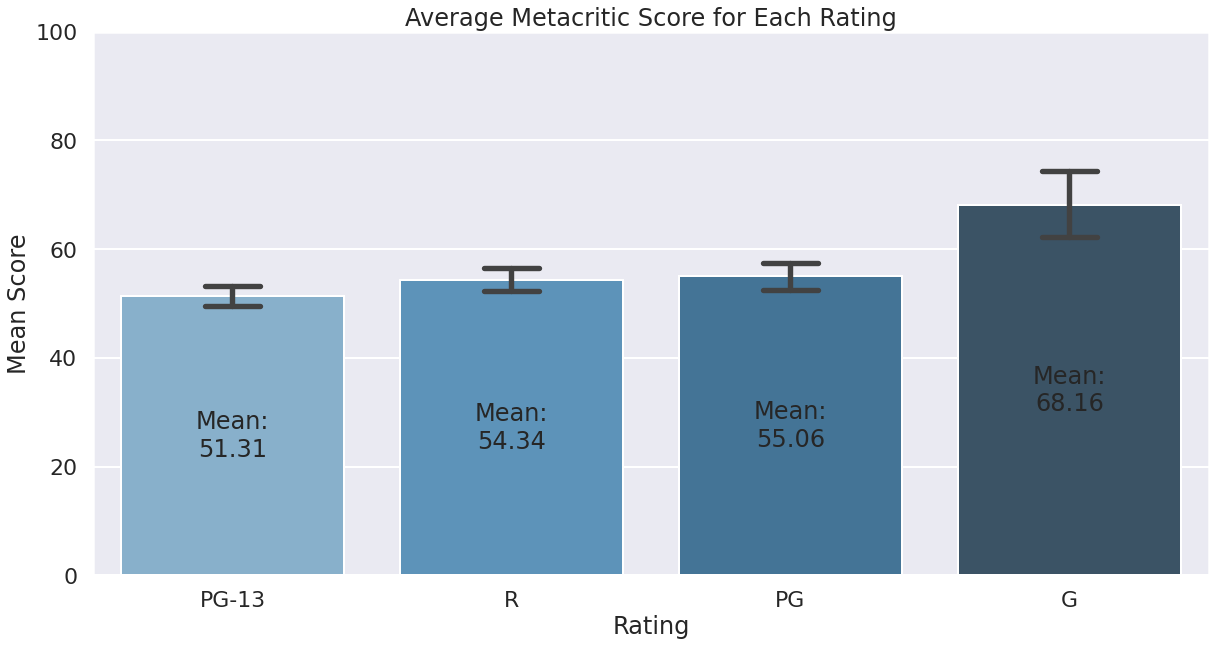

In [10]:
# barplot representing the mean metacritic scores for each rating
def plot3():
    fig, ax = plt.subplots(figsize=(20,10))
    sns.barplot(x='Rating', y='Metacritic', data=df, capsize=0.2, palette=("Blues_d"), ax=ax)
    ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')
    ax.set(ylabel='Mean Score')
    sns.set_context("poster")
    ax.set(ylim=(0, 100))
    ax.set_title("Average Metacritic Score for Each Rating")

plot3()

As expected from analyzing the spread above, there is very little range between the averages of the 'PG-13', 'R', and 'PG' categories with it being 3.75 being the difference.  Again, there isn't enough data to formulate these types conclusions of the 'G' category but overall, it can be stated for the top 1000 sci-fi films, film rating and intended audience has very little correlation to Metacritic score.

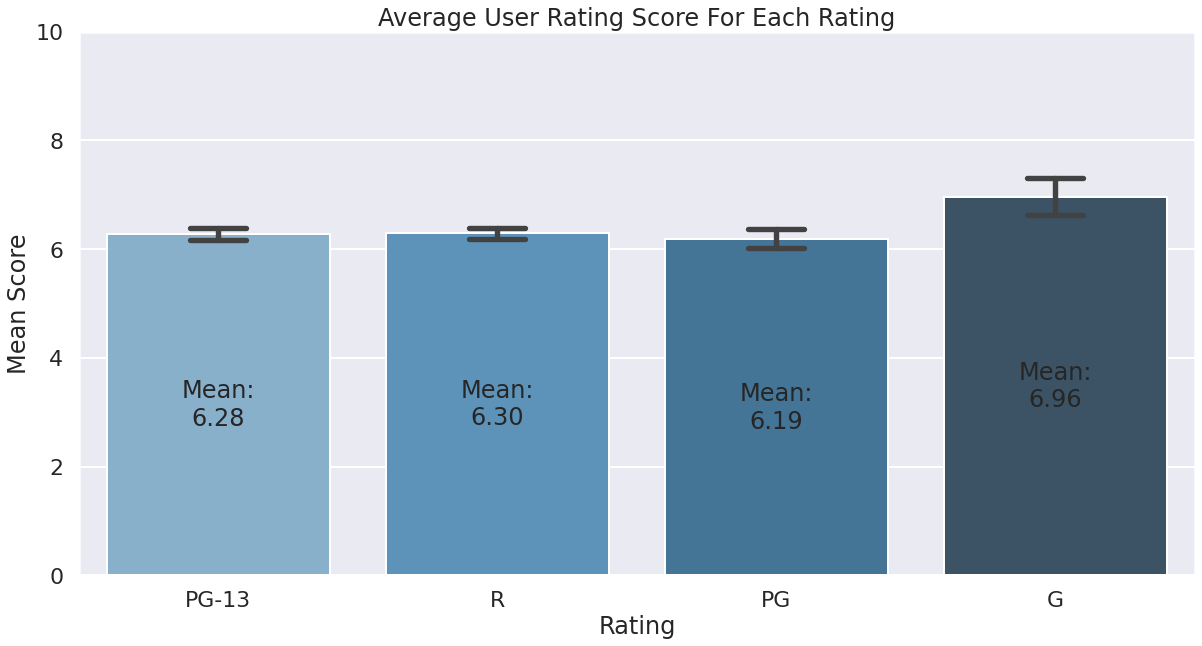

In [11]:
# same thing with 'User Rating' instead
def plot4():
    fig, ax = plt.subplots(figsize=(20,10))
    sns.barplot(x='Rating', y='User Rating', data=df, capsize=0.2, palette=("Blues_d"), ax=ax)
    ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')
    ax.set(ylabel='Mean Score')
    sns.set_context("poster")
    ax.set(ylim=(0, 10))
    ax.set_title("Average User Rating Score For Each Rating")

plot4()

The range this time between the max and min averages of the 'PG-13', 'R', and 'PG' categories is smaller than with the Metacritic scores of .11 (which multiplying by 10 will give us 1.1 comparatively to the Metacritic scale).  While it does appear that users tend to rate sci-fi films higher than critics, it is very easy to say that film rating and intended audience has no correlation to User Rating.

## Reflection

Working with a dataset that was gathered through a web scraper that I developed allowed me to emotionally delve further into the analysis.  It allowed me to learn that there were ideas and conclusions to be made of the data from all the steps in the analytical process whether it was cleaning null values or simply creating the graphs.  This notebook gave an overview and insight on how critics and users view the top sci-fi films that were released.  Regarding its popularity, it gives us cultural insight on how trends work and how certain films are able to stay in the radar of any film seeker looking for a new movie to watch.  The notebook also opens the door for further possible analysis not only looking at the sci-fi genre with other mediums, but perhaps comparing the sci-fi genre to other film genres.